In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'numpy'

In [5]:
df = pd.read_csv("iris.csv")
df.head()

NameError: name 'pd' is not defined

In [45]:
df['Iris-setosa'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [46]:
lst = df['Iris-setosa'].unique().tolist()
for idx in range(len(df['Iris-setosa'])):
    df['Iris-setosa'][idx] = lst.index(str(df['Iris-setosa'][idx]))
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_10468\2343087500.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Iris-setosa'][idx] = lst.index(str(df['Iris-setosa'][idx]))


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [5]:
import seaborn as sns

In [47]:
target = df['Iris-setosa']

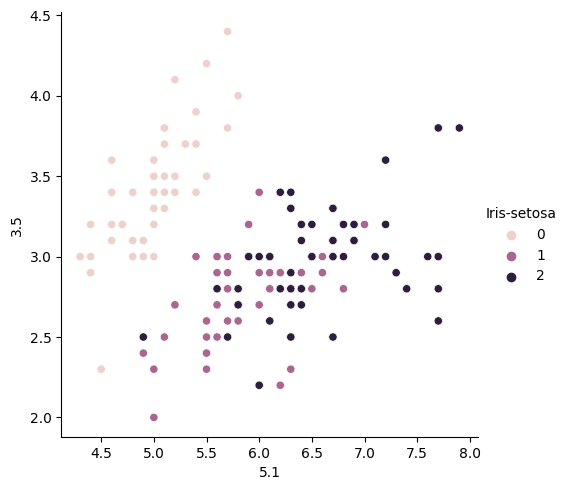

In [49]:
sns.relplot(data = df, x = df['5.1'], y = df['3.5'], hue = df['Iris-setosa'])

In [50]:
df.drop(columns = ['Iris-setosa'], inplace= True)
df.head()

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [120]:
def euclidianDist(v1, v2):
    diff = v1-v2
    sq = np.dot(diff, diff.T)
    sq = np.sqrt(sq)
    return sq

In [53]:
X = df.to_numpy()
Y = target.to_numpy()

In [148]:
X[100]

array([5.8, 2.7, 5.1, 1.9])

In [65]:
test_size = int(0.2*len(X))
X_test = []
Y_test = []
X_train = []
Y_train = []
rnd = np.random.randint(0, len(X), (test_size,))
rnd
for i in range(len(X)):
    for j in rnd:
        if i == int(j):
            X_test.append(X[i])
            Y_test.append(Y[i])
        else:
            X_train.append(X[i])
            Y_train.append(Y[i])
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [68]:
Y_test.shape

(29,)

In [131]:
def knn(newX, X, Y, params):
    dists = {}
    for id in range(len(X)):
        dist = euclidianDist(newX, X[id])[0][0]
        dists[dist] = Y[id]
    dists = sorted(dists.items())
    i = 0
    label = []
    while i<=params-1:
        label.append(dists[i][1])
        i+=1
    pred_label = max(label, key = label.count)
    return pred_label

In [101]:
def sortDict(dic):
    return sorted(dic.items())

In [151]:
def predictKNN(X_t, X, Y, params = 3):
    Y_pred = []
    for i in range(len(X_t)):
        x = [X_t[i]]
        Y_pred.append(knn(x, X, Y, params))
    return np.array(Y_pred)

In [162]:
def accuracyKNN(y_pred, y):
    acc = {
        "correct" : 0,
        "false" : 0,
        "total" : len(y)
    }
    for i in range(len(y_pred)):
        if y_pred[i] == y[i]:
           acc["correct"] += 1
        else:
            acc["false"] += 1
    return acc

In [156]:
x = [[6.4, 3.2, 4.5, 1.5], [5.8, 2.7, 5.1, 1.9], [7.0, 3, 4.92, 2.1]]

In [163]:
Y_pred = predictKNN(X_test, X_train, Y_train, 5)
print(accuracyKNN(Y_pred, Y_test))

{'correct': 28, 'false': 1, 'total': 29}
